# Oultine of the project:



1. Importing all important libraries
2. Loading and understanding the data
3. Exlporing the data
4. Visualizing the data
   -> Checking if our data is skewed or not using countplot
   -> Plot the grids for every species
5. Checking the Null values
6. Dividing the data into training and testing
7. Model Development
   -> using Logistic Regression, Support Vector Machine, Decision Tree, Gradient Boosting
   -> Calculating loss
   -> Training on every algorithm
   -> Choosing the best
8. Saving the Model
9. Deploy the Model

# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_iris

# Load & Understand the Data

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [4]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [5]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# Exploring the Data

In [8]:
# converting the dataset into dataframes

data = pd.DataFrame(X, columns=iris.feature_names )
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
data["Species"] = y

In [10]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
data.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [12]:
data.shape

(150, 5)

------------------150 rows and 5 columns, including target column--------------------

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [14]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# Visualizing the Data

1. Check whether data is skewed or not

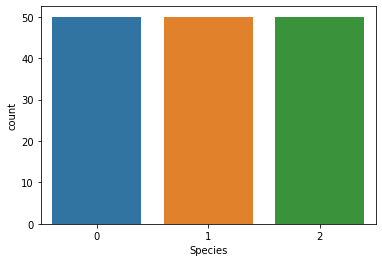

In [15]:
sns.countplot(data["Species"])

Plot the grids for every attributes with respect to species

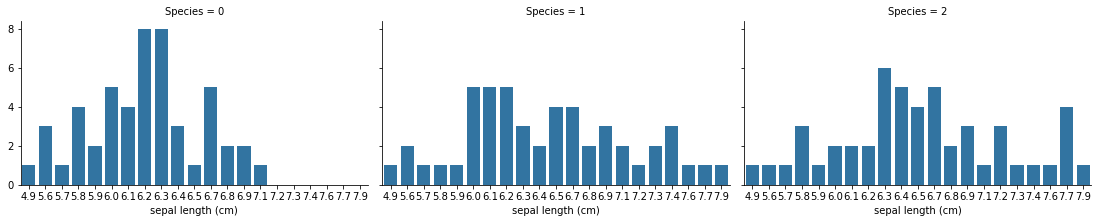

In [16]:
grid = sns.FacetGrid(data, col="Species", size=3.2, aspect=1.6)
grid.map(sns.countplot, 'sepal length (cm)')

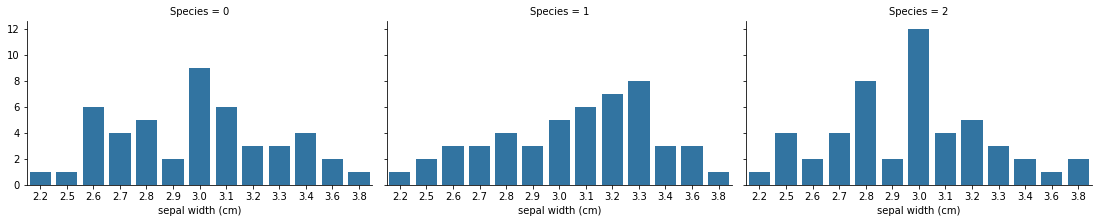

In [17]:
grid = sns.FacetGrid(data, col="Species", size=3.2, aspect=1.6)
grid.map(sns.countplot, 'sepal width (cm)')

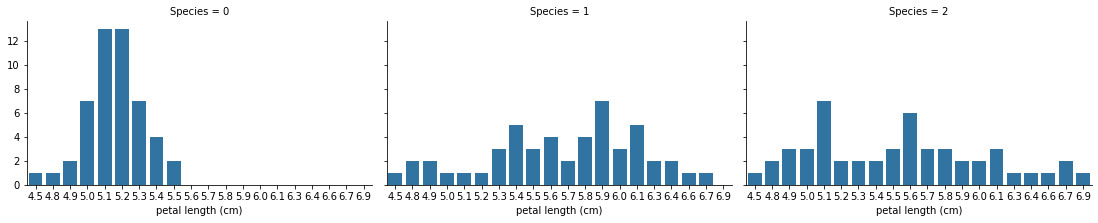

In [18]:
grid = sns.FacetGrid(data, col="Species", size=3.2, aspect=1.6)
grid.map(sns.countplot, 'petal length (cm)')

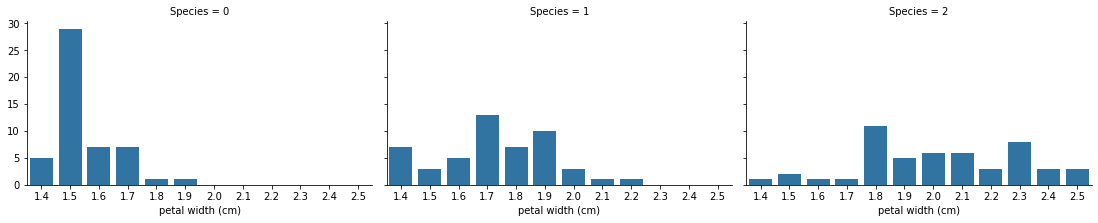

In [19]:
grid = sns.FacetGrid(data, col="Species", size=3.2, aspect=1.6)
grid.map(sns.countplot, 'petal width (cm)')

# Checking the Null values

In [20]:
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

# Dividing the data into training and testing

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [22]:
print(X_train.shape)

(105, 4)


In [23]:
print(X_test.shape)

(45, 4)


In [24]:
print(y_train.shape)

(105,)


In [25]:
print(y_test.shape)

(45,)


# Model Development

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix

In [27]:
models = {
    'Logistic_Regression' : LogisticRegression(random_state=42),
    'SVC' : SVC(kernel="rbf", gamma=0.5, probability=True),
    'DecisionTreeClassifier' : DecisionTreeClassifier(max_depth=1, random_state=42),
    'GradientBoostingClassifier' : GradientBoostingClassifier(max_depth=1, n_estimators=3, learning_rate=1.0, random_state=42)
}

In [28]:
def loss(y_true, y_pred ,retur=False):
    pre = precision_score(y_true, y_pred, average="macro")
    rec = recall_score(y_true, y_pred, average="macro")
    acc = accuracy_score(y_true, y_pred)
    
    if retur:
        return pre, rec, acc
    else:
        print("Precision : ",pre)
        print("Recall : ",rec)
        print("Accuracy : ",acc)

In [29]:
def train_and_eval(models, X, y):
    for name,model in models.items():
        print(name, ':')
        model.fit(X,y)
        loss(y, model.predict(X))
        print('*'*30)

In [30]:
train_and_eval(models, X_train, y_train)

Logistic_Regression :
Precision :  0.964835164835165
Recall :  0.963963963963964
Accuracy :  0.9619047619047619
******************************
SVC :
Precision :  0.9912280701754387
Recall :  0.990990990990991
Accuracy :  0.9904761904761905
******************************
DecisionTreeClassifier :
Precision :  0.5
Recall :  0.6666666666666666
Accuracy :  0.6476190476190476
******************************
GradientBoostingClassifier :
Precision :  0.964835164835165
Recall :  0.963963963963964
Accuracy :  0.9619047619047619
******************************


**Choosing the Best Model**

In [31]:
grad = GradientBoostingClassifier(max_depth=1, n_estimators=3, learning_rate=1.0, random_state=42)
grad.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=3,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [32]:
grad.predict([[1.2,1.5,1.6,1.2]])

array([0])

Belongs to setosa class

#  Save the Model


In [33]:
import joblib

joblib.dump(grad,'model.pkl')
grad_load = joblib.load('model.pkl')

# Deploy the model